**1 Data Issues**

In [ ]:
from numpy.matrixlib import defmatrix
import pandas as pd
df1 = pd.read_csv('DataMax.csv')
df2 = pd.read_csv('DataFardina.csv')
df = pd.merge(df1, df2, how='outer')


Cleaning the data

In [ ]:
mask = (df.apply(lambda row: row.astype(str).str.strip() == '').sum(axis=1) > 4)
df = df[~mask]

In [ ]:
for column in df.columns:
    most_common_value = df[column].mode()[0]
    df[column].fillna(most_common_value, inplace=True)

**2 My Questions**

Are liberals more likely to have grown up with liberal adults?

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(
    df['q5'].isin(['Mildly liberal', 'Strongly liberal']),
    df['q4'].isin(['Mildly liberal', 'Strongly liberal'])
)

_, p, _, _ = chi2_contingency(contingency_table)

print(f'P-value: {p}')

P-value: 3.730957363549606e-05


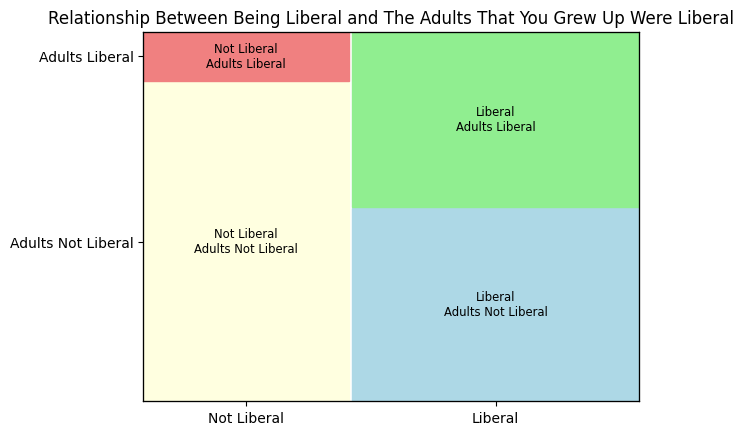

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

color_dict = {
    ('Liberal', 'Adults Liberal'): 'lightgreen',
    ('Liberal', 'Adults Not Liberal'): 'lightblue',
    ('Not Liberal', 'Adults Liberal'): 'lightcoral',
    ('Not Liberal', 'Adults Not Liberal'): 'lightyellow'
}

plot = df.copy()
plot['Liberal'] = plot['q5'].apply(lambda x: 'Liberal' if x in ['Mildly liberal', 'Strongly liberal'] else 'Not Liberal')
plot['Adults Liberal'] = plot['q4'].apply(lambda x: 'Adults Liberal' if x in ['Mildly liberal', 'Strongly liberal'] else 'Adults Not Liberal')

mosaic(plot, ['Liberal', 'Adults Liberal'], title='Relationship Between Being Liberal and The Adults That You Grew Up Were Liberal', properties=lambda key: {'color': color_dict[key]})
plt.show()

Do females and males tend to disagree in their responses?

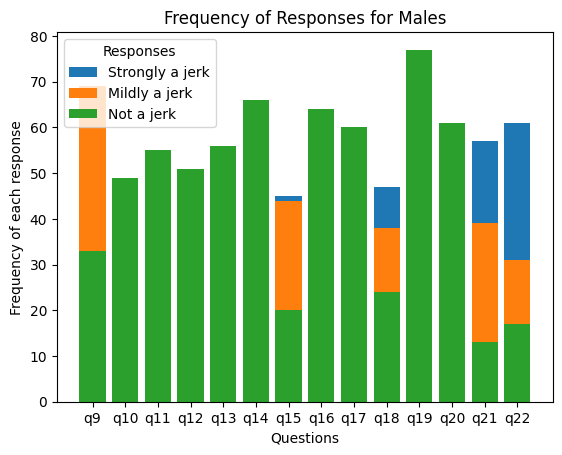

In [ ]:
response_counts = {response: [] for response in df['q9'].unique()}
new_df = df[df['q7'] == 'Male'].drop(columns=['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q8', 'q7'])

# Loop through columns q9 to q22 and count response frequencies
for col in new_df.columns:
    for response in new_df[col].unique():
        response_counts[response].append((col, (new_df[col] == response).sum()))

for response, counts in response_counts.items():
    columns, frequencies = zip(*counts)
    plt.bar(columns, frequencies, label=response)

plt.xlabel('Questions')
plt.ylabel('Frequency of each response')
plt.legend(title='Responses')
plt.title('Frequency of Responses for Males')
plt.show()



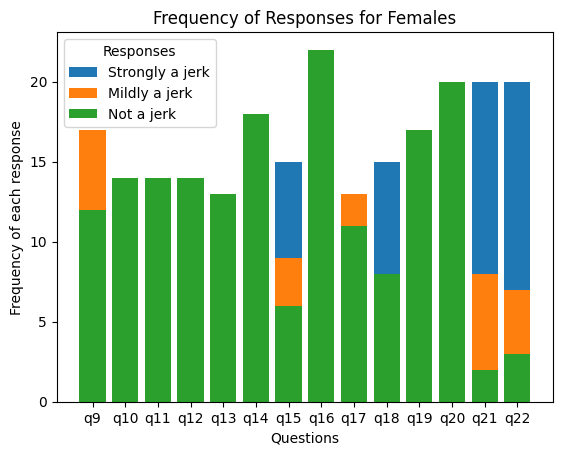

In [ ]:
####################
response_counts2 = {response: [] for response in df['q9'].unique()}
female_df = df[df['q7'] == 'Female'].drop(columns=['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q8', 'q7'])

# Loop through columns q9 to q22 and count response frequencies
for col in female_df.columns:
    for response in female_df[col].unique():
        response_counts2[response].append((col, (female_df[col] == response).sum()))


for response, counts in response_counts2.items():
    columns, frequencies = zip(*counts)
    plt.bar(columns, frequencies, label=response)



plt.xlabel('Questions')
plt.ylabel('Frequency of each response')
plt.legend(title='Responses')
plt.title('Frequency of Responses for Females')
plt.show()

Are compassionate people more likely to side with the mom? in column 16

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(
    df['q8'] == 'Yes',
    df['q16'].isin(['Not a jerk'])
)

_, p, _, _ = chi2_contingency(contingency_table)

print(f'P-value: {p}')

P-value: 0.6962703401140227
